# RFI Band Analysis — Interference Impact Across Frequency Bands

This notebook produces four plots that progressively stress-test victim satellite links across S, X, Ku, K, and Ka bands under increasing interference levels. All modeling is provided by `scenario.py`; the notebook only calls the scenario engine and generates plots.

In [6]:
import os
import sys
import matplotlib.pyplot as plt

# Ensure local package visibility (run from project root or notebooks/)
_cwd = os.getcwd()
_root = os.path.dirname(_cwd) if os.path.basename(_cwd) == "notebooks" else _cwd
if _root not in sys.path:
    sys.path.insert(0, _root)

from rfi.scenario import (
    run_multi_entry_rfi_scenario,
    VICTIM_BANDS,
    INTERFERENCE_SCENARIOS,
)

TIME_SAMPLES = 5000
BAND_NAMES = list(VICTIM_BANDS.keys())

# Shared plot styling (identical across all four plots)
FIG_SIZE = (9, 5)
BAR_COLORS = ["#DCEEFF","#A8D0FF","#5FA8F5","#2F7FD8","#174A8B"]
AXES_FONTSIZE = 12
TITLE_FONTSIZE = 14
VALUE_FONTSIZE = 10

---
## Plot 1 — Baseline SNR (No Interference)

**Purpose:** Verify correct implementation of antenna theory. Ideal antenna, no interferers.

Plot 1 — Baseline SNR (No Interference)
------------------------------------------
Band       |  Baseline SNR (dB)
------------------------------------------
S-band     |               9.50
X-band     |               9.77
Ku-band    |              23.66
K-band     |              27.15
Ka-band    |              31.39
------------------------------------------
Summary:  Min = 9.50 dB  |  Max = 31.39 dB



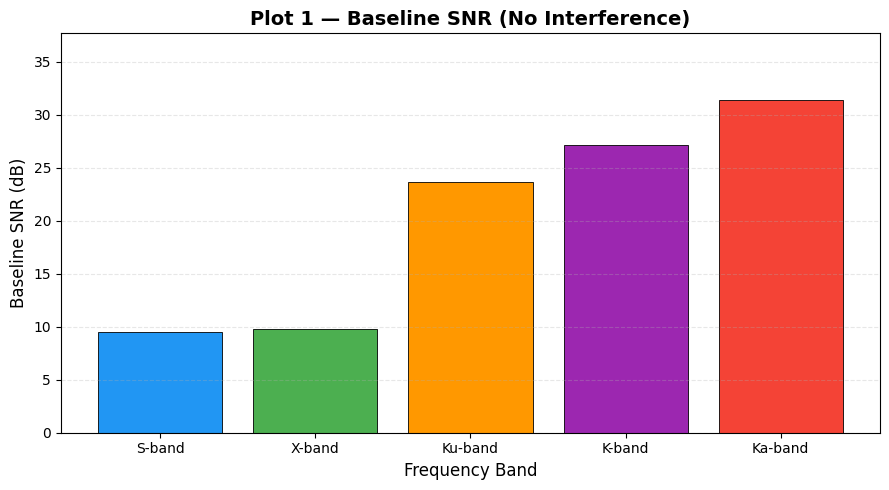

In [7]:
baseline_snr = []
for band in BAND_NAMES:
    res = run_multi_entry_rfi_scenario(
        band_params=VICTIM_BANDS[band],
        interferer_list=[],
        time_sim_samples=TIME_SAMPLES,
    )
    baseline_snr.append(res["Baseline SNR (dB)"])

print("Plot 1 — Baseline SNR (No Interference)")
print("-" * 42)
print(f"{'Band':<10} | {'Baseline SNR (dB)':>18}")
print("-" * 42)
for band, snr in zip(BAND_NAMES, baseline_snr):
    print(f"{band:<10} | {snr:>18.2f}")
print("-" * 42)
print(f"Summary:  Min = {min(baseline_snr):.2f} dB  |  Max = {max(baseline_snr):.2f} dB")
print()

fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.bar(BAND_NAMES, baseline_snr, color=BAR_COLORS, edgecolor="black", linewidth=0.6)
ax.set_xlabel("Frequency Band", fontsize=AXES_FONTSIZE)
ax.set_ylabel("Baseline SNR (dB)", fontsize=AXES_FONTSIZE)
ax.set_title("Plot 1 — Baseline SNR (No Interference)", fontsize=TITLE_FONTSIZE, fontweight="bold")
ax.grid(axis="y", alpha=0.3, linestyle="--")
ax.set_ylim(0, max(baseline_snr) * 1.2)
plt.tight_layout()
plt.show()

---
## Plot 2 — Weak Interference (ΔSNR)

Single interferer, weak EIRP. Progressive interference severity sweep.

Plot 2 — Weak Interference (ΔSNR)
--------------------------------------------------------------
Band       |  ΔSNR (dB) |   C/I (dB) |  I_Aggregate (dBW)
--------------------------------------------------------------
S-band     |       0.00 |      46.00 |            -181.12
X-band     |       0.00 |      50.00 |            -184.06
Ku-band    |       0.00 |      65.00 |            -184.50
K-band     |       0.00 |      70.00 |            -185.42
Ka-band    |       0.00 |      75.00 |            -185.68
--------------------------------------------------------------



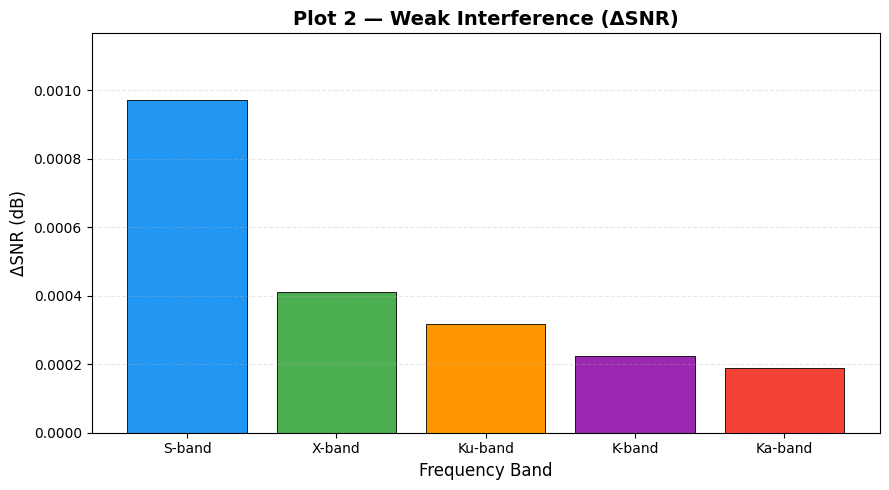

In [8]:
results_weak = []
for band in BAND_NAMES:
    res = run_multi_entry_rfi_scenario(
        band_params=VICTIM_BANDS[band],
        interferer_list=INTERFERENCE_SCENARIOS["Weak"],
        time_sim_samples=TIME_SAMPLES,
    )
    results_weak.append(res)
snr_loss_weak = [r["SNR Loss (dB)"] for r in results_weak]

print("Plot 2 — Weak Interference (ΔSNR)")
print("-" * 62)
print(f"{'Band':<10} | {'ΔSNR (dB)':>10} | {'C/I (dB)':>10} | {'I_Aggregate (dBW)':>18}")
print("-" * 62)
for band, r in zip(BAND_NAMES, results_weak):
    print(f"{band:<10} | {r['SNR Loss (dB)']:>10.2f} | {r['C/I_Aggregate (dB)']:>10.2f} | {r['I_Aggregate (dBW)']:>18.2f}")
print("-" * 62)
print()

fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.bar(BAND_NAMES, snr_loss_weak, color=BAR_COLORS, edgecolor="black", linewidth=0.6)
ax.set_xlabel("Frequency Band", fontsize=AXES_FONTSIZE)
ax.set_ylabel("ΔSNR (dB)", fontsize=AXES_FONTSIZE)
ax.set_title("Plot 2 — Weak Interference (ΔSNR)", fontsize=TITLE_FONTSIZE, fontweight="bold")
ax.grid(axis="y", alpha=0.3, linestyle="--")
ax.set_ylim(0, max(snr_loss_weak) * 1.2 if snr_loss_weak else 1)
plt.tight_layout()
plt.show()

---
## Plot 3 — Moderate Interference (ΔSNR)

Single interferer, moderate EIRP. Same geometry and bands; only interference strength changes.

Plot 3 — Moderate Interference (ΔSNR)
--------------------------------------------------------------
Band       |  ΔSNR (dB) |   C/I (dB) |  I_Aggregate (dBW)
--------------------------------------------------------------
S-band     |       0.01 |      36.00 |            -171.12
X-band     |       0.00 |      40.00 |            -174.06
Ku-band    |       0.00 |      55.00 |            -174.50
K-band     |       0.00 |      60.00 |            -175.42
Ka-band    |       0.00 |      65.00 |            -175.68
--------------------------------------------------------------



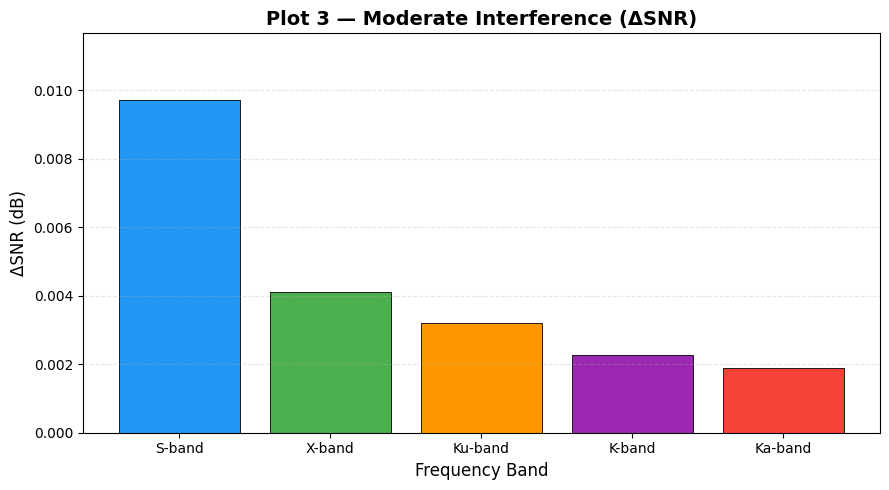

In [9]:
results_moderate = []
for band in BAND_NAMES:
    res = run_multi_entry_rfi_scenario(
        band_params=VICTIM_BANDS[band],
        interferer_list=INTERFERENCE_SCENARIOS["Moderate"],
        time_sim_samples=TIME_SAMPLES,
    )
    results_moderate.append(res)
snr_loss_moderate = [r["SNR Loss (dB)"] for r in results_moderate]

print("Plot 3 — Moderate Interference (ΔSNR)")
print("-" * 62)
print(f"{'Band':<10} | {'ΔSNR (dB)':>10} | {'C/I (dB)':>10} | {'I_Aggregate (dBW)':>18}")
print("-" * 62)
for band, r in zip(BAND_NAMES, results_moderate):
    print(f"{band:<10} | {r['SNR Loss (dB)']:>10.2f} | {r['C/I_Aggregate (dB)']:>10.2f} | {r['I_Aggregate (dBW)']:>18.2f}")
print("-" * 62)
print()

fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.bar(BAND_NAMES, snr_loss_moderate, color=BAR_COLORS, edgecolor="black", linewidth=0.6)
ax.set_xlabel("Frequency Band", fontsize=AXES_FONTSIZE)
ax.set_ylabel("ΔSNR (dB)", fontsize=AXES_FONTSIZE)
ax.set_title("Plot 3 — Moderate Interference (ΔSNR)", fontsize=TITLE_FONTSIZE, fontweight="bold")
ax.grid(axis="y", alpha=0.3, linestyle="--")
ax.set_ylim(0, max(snr_loss_moderate) * 1.2 if snr_loss_moderate else 1)
plt.tight_layout()
plt.show()

---
## Plot 4 — Strong Interference (ΔSNR)

Single interferer, strong EIRP. Completes the progressive interference severity sweep.

Plot 4 — Strong Interference (ΔSNR)
----------------------------------------------------------------------------------------
Band       |  ΔSNR (dB) |   C/I (dB) |  I_Aggregate (dBW) |   P(ΔSNR>1 dB) (%) |   P(ΔSNR>3 dB) (%)
----------------------------------------------------------------------------------------
S-band     |       0.00 |      44.00 |            -179.12 |               0.00 |               0.00
X-band     |       0.04 |      30.00 |            -164.06 |               0.84 |               0.08
Ku-band    |       0.03 |      45.00 |            -164.50 |               0.34 |               0.02
K-band     |       0.02 |      50.00 |            -165.42 |               0.16 |               0.00
Ka-band    |       0.02 |      55.00 |            -165.68 |               0.12 |               0.00
----------------------------------------------------------------------------------------



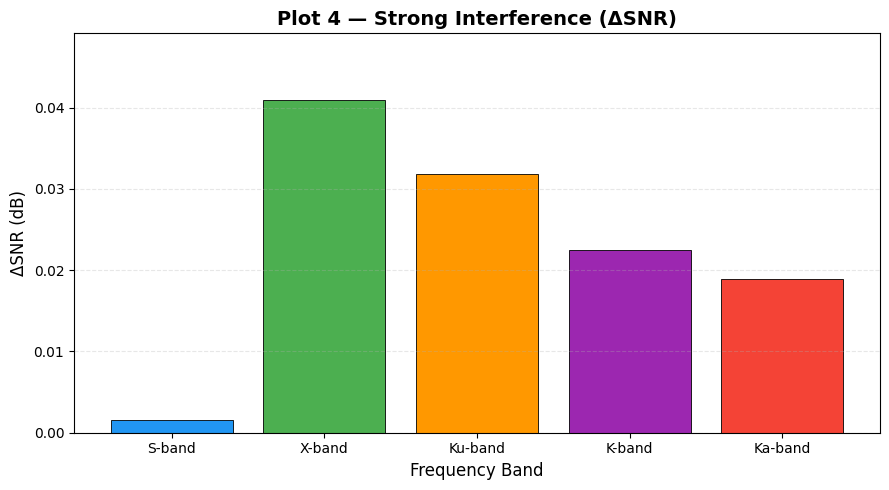

In [10]:
results_strong = []
for band in BAND_NAMES:
    res = run_multi_entry_rfi_scenario(
        band_params=VICTIM_BANDS[band],
        interferer_list=INTERFERENCE_SCENARIOS["Strong"],
        time_sim_samples=TIME_SAMPLES,
    )
    results_strong.append(res)
snr_loss_strong = [r["SNR Loss (dB)"] for r in results_strong]

print("Plot 4 — Strong Interference (ΔSNR)")
print("-" * 88)
print(f"{'Band':<10} | {'ΔSNR (dB)':>10} | {'C/I (dB)':>10} | {'I_Aggregate (dBW)':>18} | {'P(ΔSNR>1 dB) (%)':>18} | {'P(ΔSNR>3 dB) (%)':>18}")
print("-" * 88)
for band, r in zip(BAND_NAMES, results_strong):
    p1 = r["P(SNR Loss > 1 dB) (%)"]
    p3 = r["P(SNR Loss > 3 dB) (%)"]
    print(f"{band:<10} | {r['SNR Loss (dB)']:>10.2f} | {r['C/I_Aggregate (dB)']:>10.2f} | {r['I_Aggregate (dBW)']:>18.2f} | {p1:>18.2f} | {p3:>18.2f}")
print("-" * 88)
print()

fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.bar(BAND_NAMES, snr_loss_strong, color=BAR_COLORS, edgecolor="black", linewidth=0.6)
ax.set_xlabel("Frequency Band", fontsize=AXES_FONTSIZE)
ax.set_ylabel("ΔSNR (dB)", fontsize=AXES_FONTSIZE)
ax.set_title("Plot 4 — Strong Interference (ΔSNR)", fontsize=TITLE_FONTSIZE, fontweight="bold")
ax.grid(axis="y", alpha=0.3, linestyle="--")
ax.set_ylim(0, max(snr_loss_strong) * 1.2 if snr_loss_strong else 1)
plt.tight_layout()
plt.show()

**Why S-band has the lowest ΔSNR (Plot 4):** S-band has the widest beam (θ₃dB = 2.5°). At 5° off-axis, it experiences stronger antenna discrimination relative to the narrower high-frequency beams under the ITU pattern model. The higher-frequency bands, with narrower beams and higher receive gains, exhibit comparatively greater susceptibility at this angular separation. This antenna behavior explains why S-band shows the lowest SNR degradation in Plot 4 under strong interference.